# Import SVM model outputs and use to generate word clouds for cluster analysis

## Gareth Walker


In [192]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt



def return_cluster_words(List_Tup): # recieves a list of tuples giving CIRI lable and respective score
    cluster_df = pd.DataFrame(columns=['Top_words','Top_words_coefs','CIRI_label'])
    top_features =20

    for tup in List_Tup:
        ciri_label = tup[0]
        score= tup[1]
        
        
        #if score >= 2: # Controlls for good scores, which dont need to be summarised in word cloud.
        #    continue
        
        df_class = df_model_features[df_model_features['Class']==ciri_label]

        # lookup top words and coefs
        #top_coefs = coefs[top_positive_coefficients]
        #feature_names = np.array(feature_names)
        #top_words = feature_names[top_positive_coefficients]
        
        # export to DF
        tup_df = pd.DataFrame()
        
        tup_df['Top_words']=df_class['Top words '+str(score)]
        tup_df['Top_words_coefs']=df_class['Top word coefs '+str(score)]
        
        tup_df['CIRI_label']=ciri_label
        cluster_df = cluster_df.append(tup_df)
        cluster_df=cluster_df.reset_index(drop=True)
    return cluster_df

def generate_cloud_text(df):
    
    for i in range(len(df.index)):
        df.loc[i,'Wieghted_string'] = (str(df.loc[i,'Top_words'])+' ') * int(df.loc[i,'Top_words_coefs']*10000)

    output = df['Wieghted_string'].str.cat(sep=' ')
    return output


def show_wordcloud(data, cluster_year, cluster_id, title = None):
    wordcloud = WordCloud(
        background_color='white',
        collocations=False,
        #stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        width = 200,
        height = 200,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    
    plt.savefig('../data/Cluster_Word_Clouds/'+str(cluster_year)+'_'+str(cluster_id)+'.png')
    #plt.show()
    
def cluster_word_cloud(List_Tup,cluster_year,cluster_id):
    cluster_df = return_cluster_words(List_Tup)
    wieghted_text = generate_cloud_text(cluster_df)
    show_wordcloud(wieghted_text,cluster_year,cluster_id)

In [194]:
df_model_features = pd.read_csv('../data/SVM_Features.csv')
df_model_features=df_model_features.fillna(0)

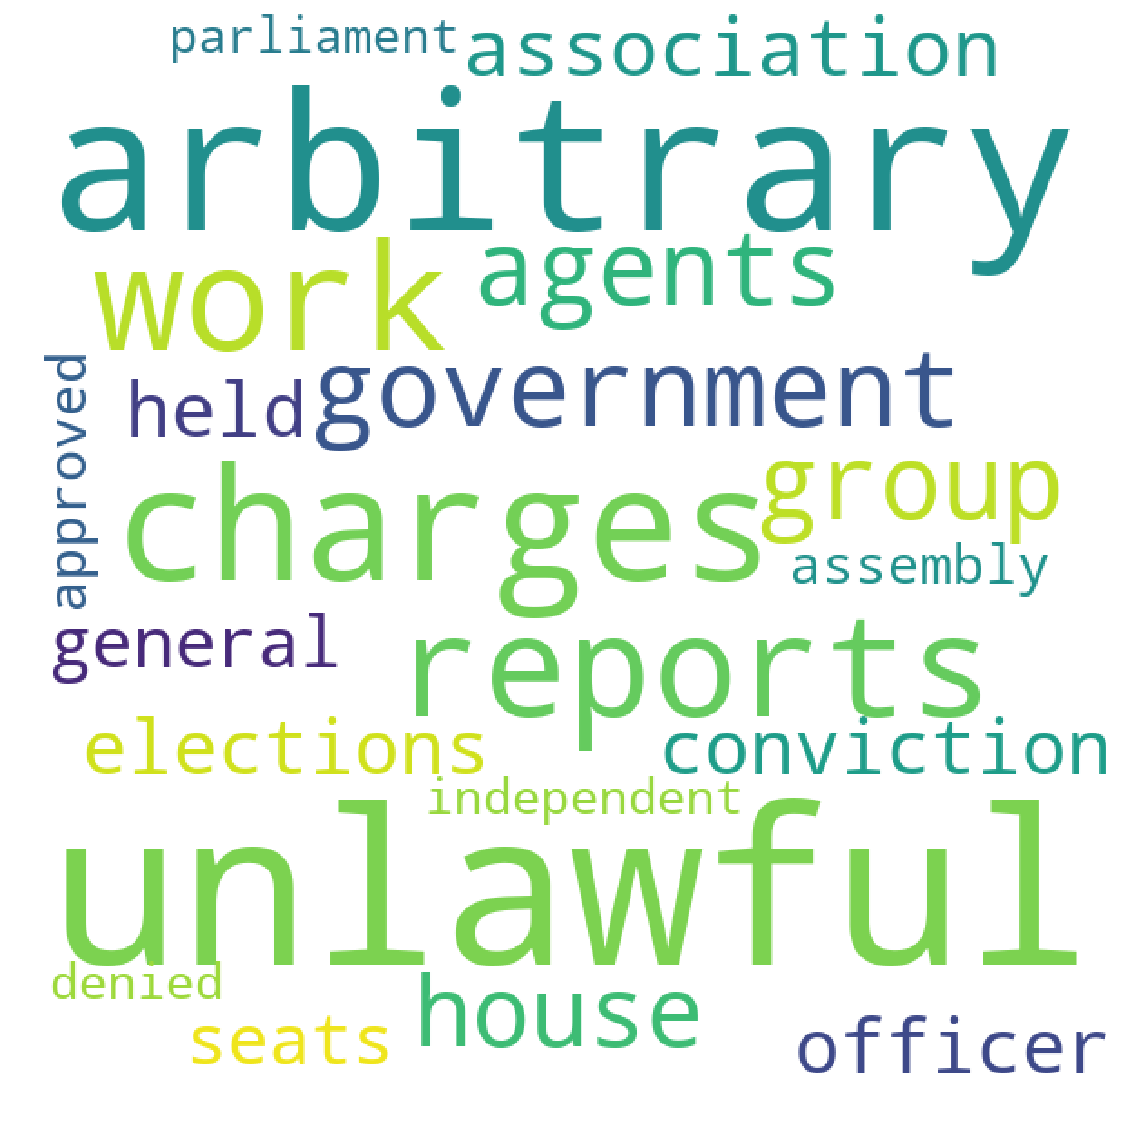

In [190]:
test_list =[('KILL',2),('KILL',2)]
cluster_word_cloud(test_list,'test',1)

In [174]:
cluster_data = pd.read_csv('../data/cluster_word.csv')

In [175]:
cluster_data.columns = map(lambda x: str(x).upper(), cluster_data.columns)    

In [176]:
cluster_data=cluster_data.replace(0.5,1)
cluster_data = cluster_data.astype(int)

In [177]:
cluster_data

,CLASS,DISAP,KILL,TORT,INJUD,FORMOV,DOMMOV,SPEECH,ASSN,ELECSD,NEW_RELFRE,POLPRIS,WORKER,WECON,WOPOL,YEAR
0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,2,2013
1,2,2,1,1,1,2,2,1,1,1,2,2,1,1,2,2013
2,3,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2013
3,4,2,2,2,2,2,2,2,2,2,2,2,1,3,3,2013
4,5,2,2,0,0,1,1,0,0,0,0,1,0,1,2,2013
5,1,1,1,0,0,1,1,0,0,1,0,1,0,1,2,2014
6,2,2,1,1,0,2,2,1,1,1,2,2,1,1,2,2014
7,3,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2014
8,4,2,2,2,2,2,2,1,2,2,1,2,2,3,3,2014
9,5,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2014


In [178]:
tupled_df = pd.DataFrame()

years = cluster_data['YEAR'].unique()
index_count = 0

for year in years:
    
    df = cluster_data[cluster_data['YEAR']==year]
    df = df.drop(columns='YEAR')
    
    for i in range(len(df.index)):
        
        tupes = zip(df.columns[1:],df.iloc[i,:].values)
        tupes = list(tupes) 
        tupled_df.loc[index_count,'Year'] = year
        tupled_df.loc[index_count,'Cluster'] = i+1
        tupled_df.loc[index_count,'Tuple'] = [tupes]
        
        index_count += 1

Year: 2013.0  Cluster: 1.0
Year: 2013.0  Cluster: 2.0
Year: 2013.0  Cluster: 3.0
Year: 2013.0  Cluster: 4.0
Year: 2013.0  Cluster: 5.0
Year: 2014.0  Cluster: 1.0
Year: 2014.0  Cluster: 2.0
Year: 2014.0  Cluster: 3.0
Year: 2014.0  Cluster: 4.0
Year: 2014.0  Cluster: 5.0
Year: 2014.0  Cluster: 6.0
Year: 2014.0  Cluster: 7.0
Year: 2014.0  Cluster: 8.0
Year: 2015.0  Cluster: 1.0
Year: 2015.0  Cluster: 2.0
Year: 2015.0  Cluster: 3.0
Year: 2015.0  Cluster: 4.0
Year: 2015.0  Cluster: 5.0
Year: 2015.0  Cluster: 6.0


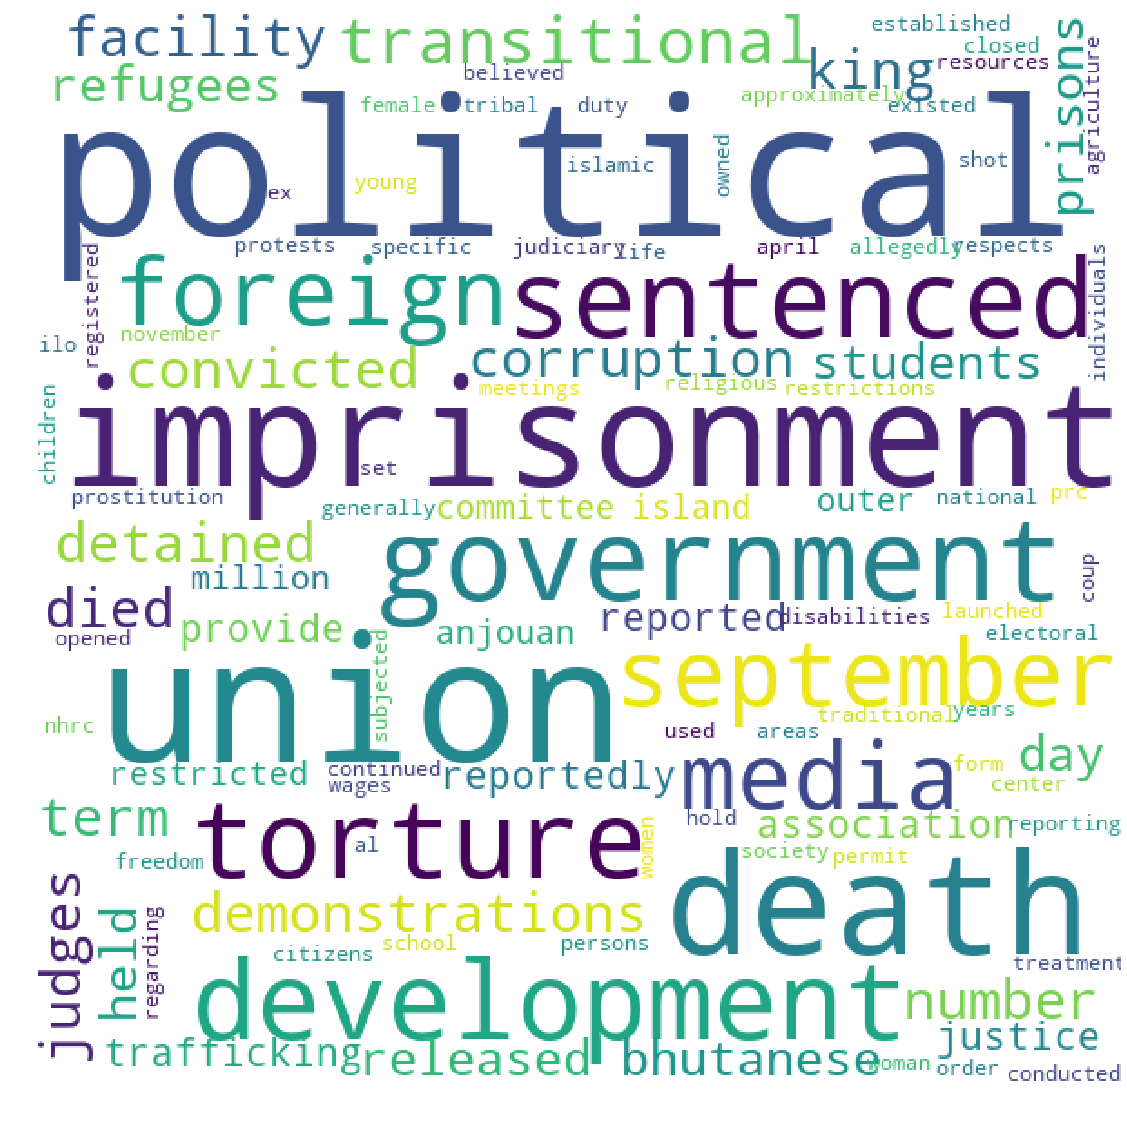

In [195]:
for i in range(len(tupled_df.index)):
    year = tupled_df.iloc[i,0]
    cluster = tupled_df.iloc[i,1]
    print('Year: '+ str(year) + '  Cluster: ' + str(cluster))
    cluster_tuple = tupled_df.iloc[i,2]
    cluster_word_cloud(cluster_tuple,year,cluster)


In [170]:
tupled_df.iloc[i,2]

[('DISAP', 1),
 ('KILL', 1),
 ('TORT', 0),
 ('INJUD', 0),
 ('FORMOV', 0),
 ('DOMMOV', 1),
 ('SPEECH', 1),
 ('ASSN', 0),
 ('ELECSD', 0),
 ('NEW_RELFRE', 1),
 ('POLPRIS', 0),
 ('WORKER', 0),
 ('WECON', 0),
 ('WOPOL', 1)]

In [94]:
cluster_data


,class,Disappearances,Extrajudicial Killing,Torture by Govt,Judiciary Independence,Freedom of Foreign Movement,Freedom of Domestic Movement,Freedom of Speech,Freedom of Assembly,Electoral Self-Determination,Freedom of Religion,Political Imprisonment,Worker's Rights,Women's Economic Rights,Women's Political Rights,Year
0,1,1.0,0,0,0,1,1,0,0,1,0,0,0,1.0,2,2013
1,2,2.0,1,1,1,2,2,1,1,1,2,2,1,1.0,2,2013
2,3,2.0,2,1,2,2,2,2,2,2,2,2,1,2.0,2,2013
3,4,2.0,2,2,2,2,2,2,2,2,2,2,1,3.0,3,2013
4,5,2.0,2,0,0,1,1,0,0,0,0,1,0,1.0,2,2013
5,1,1.0,1,0,0,1,1,0,0,1,0,1,0,1.0,2,2014
6,2,2.0,1,1,0,2,2,1,1,1,2,2,1,1.0,2,2014
7,3,2.0,2,2,2,2,2,2,2,2,2,2,1,2.0,2,2014
8,4,2.0,2,2,2,2,2,1,2,2,1,2,2,3.0,3,2014
9,5,2.0,2,2,2,2,2,1,2,2,2,2,1,2.0,2,2014


In [85]:
cluster_data.loc[0,:]

,class,Disappearances,Extrajudicial Killing,Torture by Govt,Judiciary Independence,Freedom of Foreign Movement,Freedom of Domestic Movement,Freedom of Speech,Freedom of Assembly,Electoral Self-Determination,Freedom of Religion,Political Imprisonment,Worker's Rights,Women's Economic Rights,Women's Political Rights,Year
0,1,1.0,0,0,0,1,1,0,0,1,0,0,0,1.0,2,2013
1,2,2.0,1,1,1,2,2,1,1,1,2,2,1,1.0,2,2013
2,3,2.0,2,1,2,2,2,2,2,2,2,2,1,2.0,2,2013
3,4,2.0,2,2,2,2,2,2,2,2,2,2,1,3.0,3,2013
4,5,2.0,2,0,0,1,1,0,0,0,0,1,0,1.0,2,2013
5,1,1.0,1,0,0,1,1,0,0,1,0,1,0,1.0,2,2014
6,2,2.0,1,1,0,2,2,1,1,1,2,2,1,1.0,2,2014
7,3,2.0,2,2,2,2,2,2,2,2,2,2,1,2.0,2,2014
8,4,2.0,2,2,2,2,2,1,2,2,1,2,2,3.0,3,2014
9,5,2.0,2,2,2,2,2,1,2,2,2,2,1,2.0,2,2014


In [47]:

df.columns[1:]

Index(['Disappearances', 'Extrajudicial Killing', 'Torture by Govt',
       'Judiciary Independence', 'Freedom of Foreign Movement',
       'Freedom of Domestic Movement', 'Freedom of Speech',
       'Freedom of Assembly', 'Electoral Self-Determination',
       'Freedom of Religion', 'Political Imprisonment', 'Worker's Rights',
       'Women's Economic Rights', 'Women's Political Rights'],
      dtype='object')

In [52]:
df.loc[0,:].values

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 2.])

In [60]:
mapped = set(tupes) 

In [61]:
mapped

{('Disappearances', 2.0),
 ('Electoral Self-Determination', 1.0),
 ('Extrajudicial Killing', 2.0),
 ('Freedom of Assembly', 1.0),
 ('Freedom of Domestic Movement', 2.0),
 ('Freedom of Foreign Movement', 1.0),
 ('Freedom of Religion', 1.0),
 ('Freedom of Speech', 2.0),
 ('Judiciary Independence', 1.0),
 ('Political Imprisonment', 2.0),
 ('Torture by Govt', 1.0),
 ("Women's Economic Rights", 1.0),
 ("Women's Political Rights", 1.0),
 ("Worker's Rights", 2.0)}

In [64]:
for i in mapped:
    print(i[0])

Freedom of Domestic Movement
Women's Political Rights
Disappearances
Torture by Govt
Freedom of Speech
Political Imprisonment
Women's Economic Rights
Freedom of Assembly
Freedom of Religion
Judiciary Independence
Extrajudicial Killing
Worker's Rights
Freedom of Foreign Movement
Electoral Self-Determination


In [180]:
cluster_df.reset_index(inplace=True)

NameError: name 'cluster_df' is not defined